In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, minimize, fit_report
from scipy.optimize import curve_fit
from tabulate import tabulate

In [2]:
input_path = '/Users/ssajal/Desktop/academic/practical_M.1/Fourier Spectroscopy/data_copy/'
output_path = '/Users/ssajal/Desktop/academic/practical_M.1/Fourier Spectroscopy/code/outputs/'

zff_file_names = np.array(["Ref_0pol_1zff_boxcar.dat","Ref_0pol_8zff_boxcar.dat","Ref_0pol_32zff_boxcar.dat"])
apo_file_names = np.array(["Ref_0pol_8zff_boxcar.dat","Ref_0pol_8zff_triangular.dat","Ref_0pol_8zff_BH3.dat"])
steel_file_names = np.array(["steel_n3_nopol_8zff_BH3.dat","steel_n6_nopol_8zff_BH3.dat"])



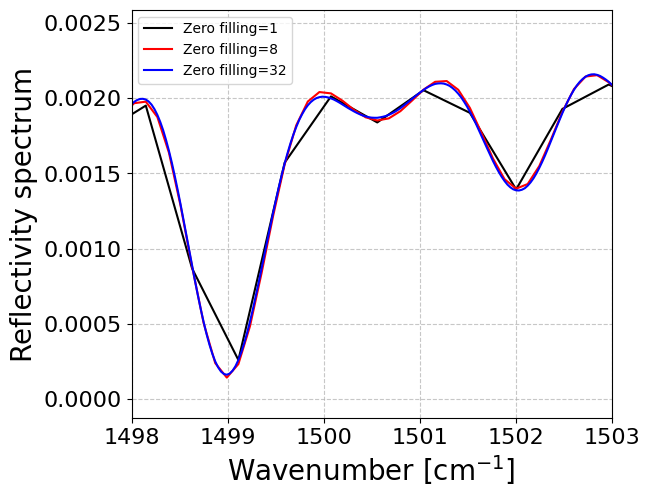

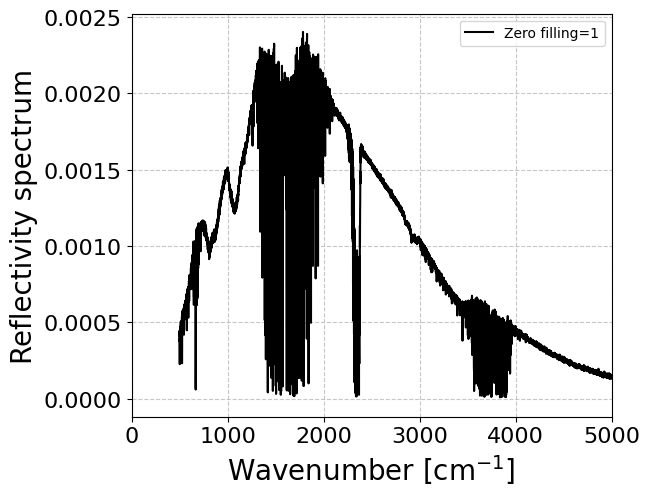

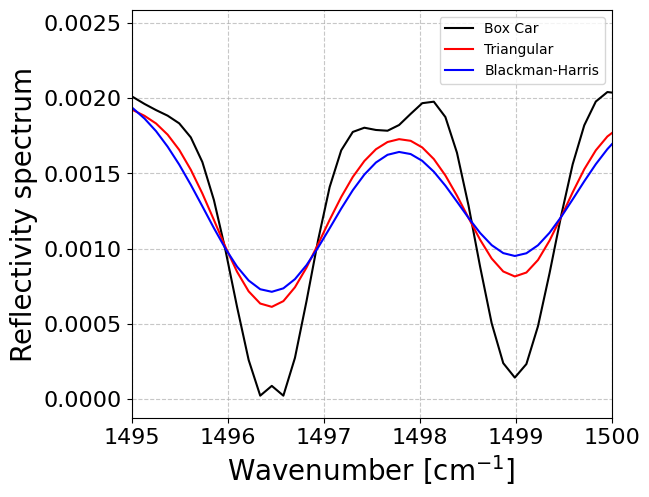

In [20]:

colors = ["Black", "Red", "blue"]

dummy_key_0 = [1,8,32]
fig, ax0 = plt.subplots() #all zero filling curvers
fig, ax_extra_0 = plt.subplots() #whole spectrum

for i in range(0,3):
    wave_number, I = np.loadtxt(input_path + zff_file_names[i], unpack = True)
    #wave_number, I = np.loadtxt(input_path + apo_file_names[i], unpack = True)
    #wave_number, I = np.loadtxt(input_path + apo_file_names[i], unpack = True)
    ax0.set_xlim(1498,1503)
    ax0.plot(wave_number, I, label = f"Zero filling={dummy_key_0[i]}", color=colors[i])

    # whole spectrum
    if i == 0:
        ax_extra_0.plot(wave_number, I, label = f"Zero filling={dummy_key_0[i]}", color=colors[i])

ax0.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax0.set_ylabel("Reflectivity spectrum",size=20)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax0.grid(True, linestyle='--', alpha=0.7)
ax0.set_position([0.2, .14, 0.75, 0.85]) #left,bottom,right,top
ax0.legend()
ax0.figure.savefig(output_path+ "zero_filling_factor.jpg")

# --------------------- whole curve
# added after got the correction from tutor
ax_extra_0.set_xlim(0,5000)
ax_extra_0.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax_extra_0.set_ylabel("Reflectivity spectrum",size=20)
ax_extra_0.tick_params(axis='x', labelsize=16)
ax_extra_0.tick_params(axis='y', labelsize=16)
ax_extra_0.grid(True, linestyle='--', alpha=0.7)
ax_extra_0.set_position([0.2, .14, 0.75, 0.84]) #left,bottom,right,top
ax_extra_0.legend()
ax_extra_0.figure.savefig(output_path+ "whole_spectrum.jpg")




dummy_key_1 = ["Box Car","Triangular","Blackman-Harris"]
fig, ax1 = plt.subplots()
for i in range(0,3):
    wave_number, I = np.loadtxt(input_path + apo_file_names[i], unpack = True)
    ax1.set_xlim(1495,1500)
    ax1.plot(wave_number, I, label = f"{dummy_key_1[i]}", color=colors[i])
ax1.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax1.set_ylabel("Reflectivity spectrum",size=20)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_position([0.2, .14, 0.75, 0.85]) #left,bottom,right,top
ax1.legend()
ax1.figure.savefig(output_path+ "apodisation_function.jpg")





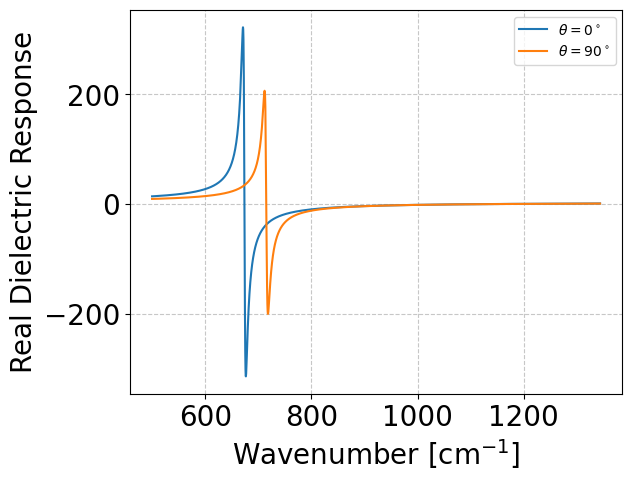

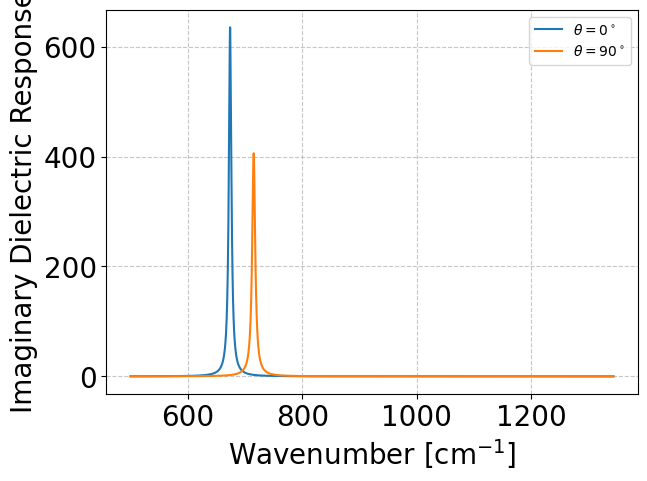

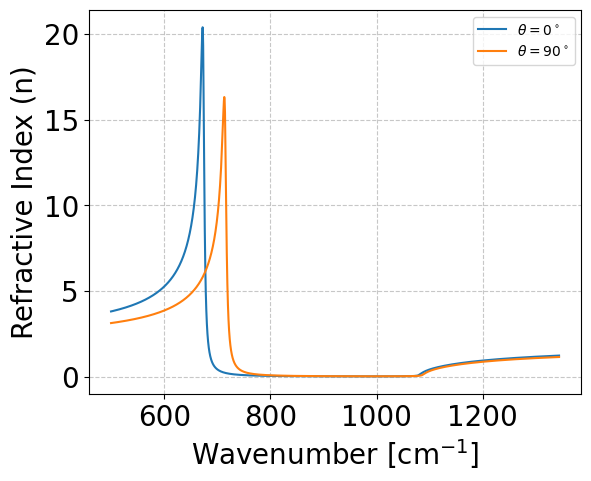

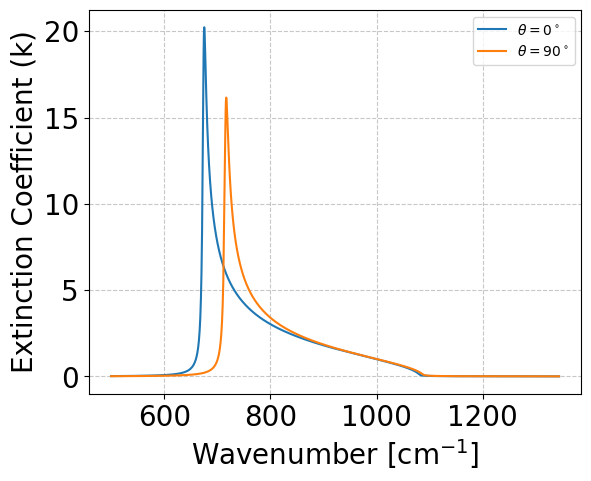

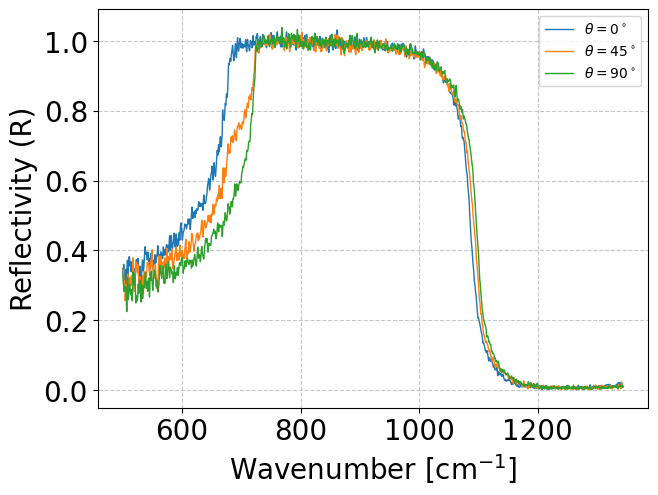

In [45]:
# dielectric function for 0 pol

data_0 = np.loadtxt(input_path + 'BeO_90pol_8zff_BH3.dat')
E_0 = data_0[-7000:,0]
reflectivity_0 = data_0[-7000:,1]
#print(E_0)




Einf_0 = 3.23
omega_p_0 = 1518.6
omega_0_0 = 673.89
gamma_0 = 5.3855


# ideal
#Einf_0 = 2.99
#omega_p_0 = 1466.34
#omega_0_0 = 680
#gamma_0 = 12.8

epsilon_0 = []

for freq in E_0:
    epsilon_val_0 = Einf_0 + omega_p_0**2 / (omega_0_0**2 - freq**2 -1j*freq*gamma_0)
    epsilon_0.append(epsilon_val_0)

epsilon_0 = np.array(epsilon_0)

real_part_0 = np.real(epsilon_0)
imaginary_part_0 = np.imag(epsilon_0)

refractive_index_0 = np.sqrt(np.sqrt(real_part_0**2 + imaginary_part_0**2)/2 + real_part_0/2)
extinction_coefficien = np.sqrt(np.sqrt(real_part_0**2 + imaginary_part_0**2)/2 - real_part_0/2)

# ------------- dielectric function for 90 pol

data_90 = np.loadtxt(input_path + 'BeO_0pol_8zff_BH3_2.dat')
E_90 = data_90[-7000:,0]
reflectivity_90 = data_90[-7000:,1]


Einf_90 = 2.75
omega_p_90 = 1358.1
omega_0_90 = 715.07
gamma_90 = 6.3509


epsilon_90 = []

for freq_90 in E_90:
    epsilon_val_90 = Einf_90 + omega_p_90**2 / (omega_0_90**2 - freq_90**2 -1j*freq_90*gamma_90)
    epsilon_90.append(epsilon_val_90)

epsilon_90 = np.array(epsilon_90)

real_part_90 = np.real(epsilon_90)
imaginary_part_90 = np.imag(epsilon_90)

refractive_index_90 = np.sqrt(np.sqrt(real_part_90**2 + imaginary_part_90**2)/2 + real_part_90/2)
extinction_coefficien_90 = np.sqrt(np.sqrt(real_part_90**2 + imaginary_part_90**2)/2 - real_part_90/2)


#----------- plot --------
fig, ax2 = plt.subplots()
ax2.plot(E_0, real_part_0, label = r'$\theta = 0^\circ$')
ax2.plot(E_90, real_part_90, label = r'$\theta = 90^\circ$')
ax2.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax2.set_ylabel("Real Dielectric Response",size=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_position([0.2, .16, 0.77, 0.80]) #left,bottom,right,top
ax2.legend()
ax2.figure.savefig(output_path+ "real_part_E.jpg")

fig, ax3 = plt.subplots()
ax3.plot(E_0, imaginary_part_0, label = r'$\theta = 0^\circ$')
ax3.plot(E_90, imaginary_part_90, label = r'$\theta = 90^\circ$')
ax3.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax3.set_ylabel("Imaginary Dielectric Response",size=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.set_position([0.16, .16, 0.83, 0.80]) #left,bottom,right,top
ax3.legend()
ax3.figure.savefig(output_path+ "imaginary_part_E.jpg")

fig, ax4 = plt.subplots()
ax4.plot(E_0, refractive_index_0, label = r'$\theta = 0^\circ$')
ax4.plot(E_90, refractive_index_90, label = r'$\theta = 90^\circ$')
#ax4.vlines(omega_0_90,ymin = 0, ymax = 20, color='r', linestyle='--', alpha = .8)
#ax4.vlines(x = E_90[np.argmax(refractive_index_90)],ymin = 0, ymax = 20, color='r', linestyle='--', alpha = .8)
#ax4.set_xlim(700,720)
#print("maaaaaaax",E_90[np.argmax(refractive_index_90)])
ax4.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax4.set_ylabel("Refractive Index (n)",size=20)
ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)
ax4.grid(True, linestyle='--', alpha=0.7)
ax4.set_position([0.13, .16, 0.77, 0.80]) #left,bottom,right,top
ax4.legend()
ax4.figure.savefig(output_path+ "refractive_index.jpg")

fig, ax5 = plt.subplots()
ax5.plot(E_0, extinction_coefficien, label = r'$\theta = 0^\circ$')
ax5.plot(E_90, extinction_coefficien_90, label = r'$\theta = 90^\circ$')
ax5.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax5.set_ylabel("Extinction Coefficient (k)",size=20)
ax5.tick_params(axis='x', labelsize=20)
ax5.tick_params(axis='y', labelsize=20)
ax5.grid(True, linestyle='--', alpha=0.7)
ax5.set_position([0.13, .16, 0.77, 0.80]) #left,bottom,right,top
ax5.legend()
ax5.figure.savefig(output_path+ "extinction_coefficient.jpg")



# ------------- dielectric function for 45 pol


data_45 = np.loadtxt(input_path + 'BeO_45pol_8zff_BH3.dat')
E_45 = data_45[-7000:,0]
reflectivity_45 = data_45[-7000:,1]

fig, ax6 = plt.subplots()
ax6.plot(E_0,reflectivity_0, lw = 1, label = r'$\theta = 0^\circ$')
ax6.plot(E_45,reflectivity_45, lw = 1, label = r'$\theta = 45^\circ$')
ax6.plot(E_90,reflectivity_90, lw = 1, label = r'$\theta = 90^\circ$')
ax6.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax6.set_ylabel("Reflectivity (R)",size=20)
ax6.tick_params(axis='x', labelsize=20)
ax6.tick_params(axis='y', labelsize=20)
ax6.grid(True, linestyle='--', alpha=0.7)
ax6.set_position([0.14, .16, 0.86, 0.83]) #left,bottom,right,top
ax6.legend()
ax6.figure.savefig(output_path+ "Reflectivity_0_45_90.jpg")
#ax6.show()


sigma_1_dc =  196.48749878180132
charge density_1 =  1.0866724944539894e+27
sigma_2_dc =  1283.6493470799624
charge density_2 =  7.662047539208888e+27


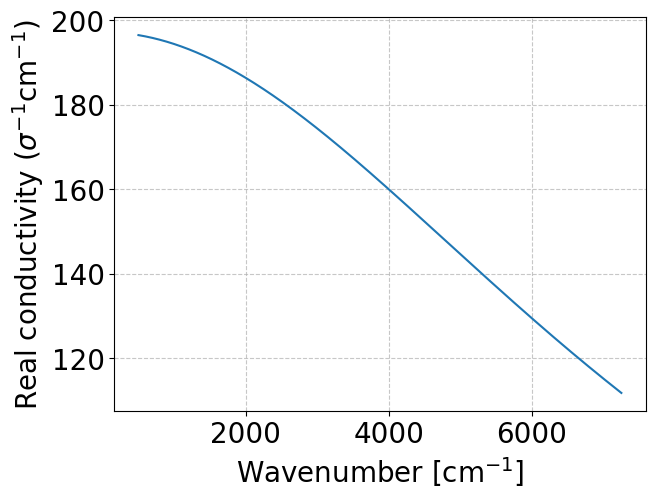

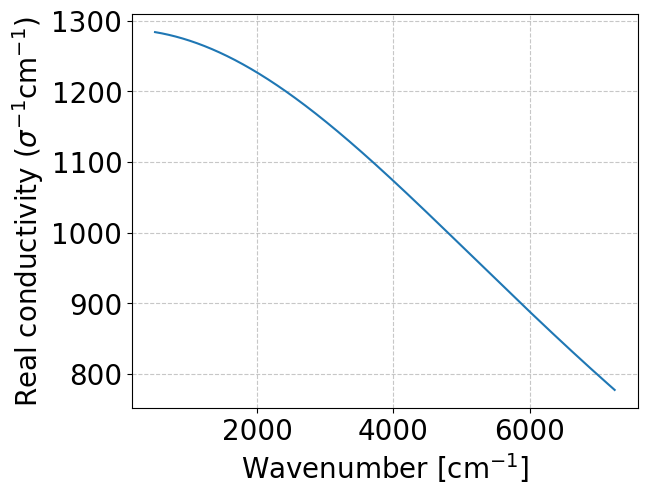

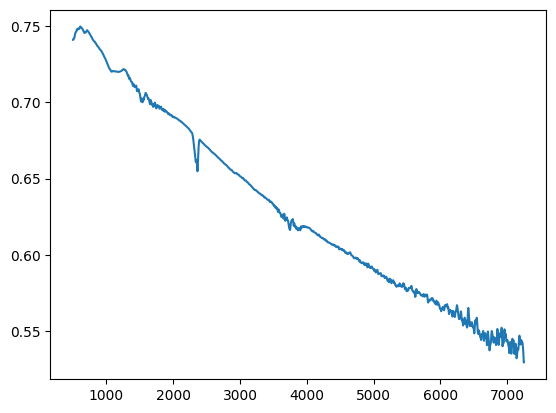

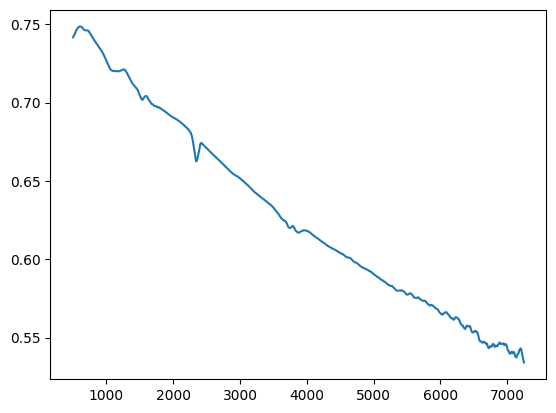

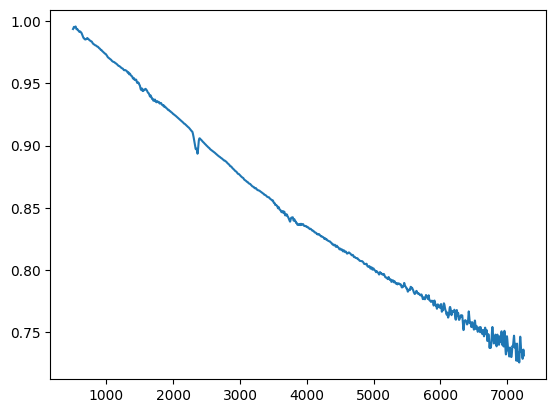

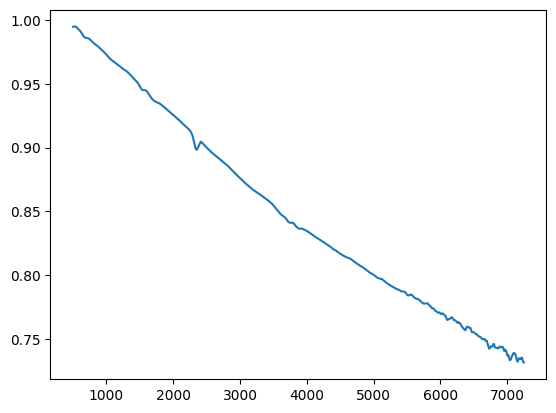

In [5]:
# ----------- steel_1
data_steel_1 = np.loadtxt(input_path + 'steel_n3_nopol_8zff_BH3.dat')
E_steel_1 = data_steel_1[:7000,0]
reflectivity_steel_1 = data_steel_1[:7000,1]



def moving_average(data, window_size):
    # Pad the data with edge values to handle boundary effects
    padded_data = np.pad(data, (window_size // 2, window_size // 2), mode='edge')
    # Apply moving average using valid convolution
    smoothed_data = np.convolve(padded_data, np.ones(window_size) / window_size, mode="valid")
    return smoothed_data

# Apply moving average to reflectivity data
smoothed_reflectivity_1 = moving_average(reflectivity_steel_1, 70)
# save the output
np.savetxt(output_path + "steel_data_n3_smoothed.txt", np.column_stack((E_steel_1, smoothed_reflectivity_1[1:])), fmt='%.6f', delimiter='\t')

# Plot original and smoothed data
#plt.plot(E_steel_1, reflectivity_steel_1, label='Original Reflectivity')
#plt.plot(E_steel_1, smoothed_reflectivity_1[1:], label='Smoothed Reflectivity')
#plt.show()



Einf_steel_1 = .337
omega_p_steel_1 = 4532
omega_0_steel_1 = 0
gamma_steel_1 = 8288.2




epsilon_steel_1 = []

for freq_steel_1 in E_steel_1:
    epsilon_val_steel_1 = Einf_steel_1 + omega_p_steel_1**2 / (omega_0_steel_1**2 - freq_steel_1**2 -1j*freq_steel_1*gamma_steel_1)
    epsilon_steel_1.append(epsilon_val_steel_1)

epsilon_steel_1 = np.array(epsilon_steel_1)

real_part_steel_1 = np.real(epsilon_steel_1)
imaginary_part_steel_1 = np.imag(epsilon_steel_1)

sigma_1 = (E_steel_1*imaginary_part_steel_1)/(4*np.pi)
print("sigma_1_dc = ", sigma_1[0])

m_e = 9.109e-31 # mass of electron
e_charge = 1.602e-19 #charge of electron

charge_density_1 = ((sigma_1[0])*10**2*(gamma_steel_1*1.88e11)*m_e) / (e_charge**2)
print("charge density_1 = ",charge_density_1)
#plt.plot(E_steel_1, sigma_1)
#plt.show()

fig, ax7 = plt.subplots()
ax7.plot(E_steel_1, sigma_1)
ax7.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax7.set_ylabel("Real conductivity ($\\sigma^{-1}$cm$^{-1}$)",size=20)
ax7.tick_params(axis='x', labelsize=20)
ax7.tick_params(axis='y', labelsize=20)
ax7.grid(True, linestyle='--', alpha=0.7)
ax7.set_position([0.165, .16, 0.83, 0.82]) #left,bottom,right,top
#ax7.legend()
ax7.figure.savefig(output_path+ "real_conductivity_n3.jpg")
#ax6.show()



# ----------- steel_2
data_steel_2 = np.loadtxt(input_path + 'steel_n6_nopol_8zff_BH3.dat')
E_steel_2 = data_steel_2[:7000,0]
reflectivity_steel_2 = data_steel_2[:7000,1]


# Apply moving average to reflectivity data
smoothed_reflectivity_2 = moving_average(reflectivity_steel_2, 70)
# save the output
np.savetxt(output_path + "steel_data_n6_smoothed.txt", np.column_stack((E_steel_2, smoothed_reflectivity_2[1:])), fmt='%.6f', delimiter='\t')

# Plot original and smoothed data
#plt.plot(E_steel_2, reflectivity_steel_2, label='Original Reflectivity')
#plt.plot(E_steel_2, smoothed_reflectivity_2[1:], label='Smoothed Reflectivity')
#plt.show()



"""
Einf_steel_2 = .299
omega_p_steel_2 = 3974.9
omega_0_steel_2 = 0
gamma_steel_2 = 10271
"""

Einf_steel_2 = .299
omega_p_steel_2 = 12031
omega_0_steel_2 = 0
gamma_steel_2 = 8945.3


epsilon_steel_2 = []

for freq_steel_2 in E_steel_2:
    epsilon_val_steel_2 = Einf_steel_2 + omega_p_steel_2**2 / (omega_0_steel_2**2 - freq_steel_2**2 -1j*freq_steel_2*gamma_steel_2)
    epsilon_steel_2.append(epsilon_val_steel_2)

epsilon_steel_2 = np.array(epsilon_steel_2)

real_part_steel_2 = np.real(epsilon_steel_2)
imaginary_part_steel_2 = np.imag(epsilon_steel_2)

sigma_2 = (E_steel_2*imaginary_part_steel_2)/(4*np.pi)
print("sigma_2_dc = ", sigma_2[0])

charge_density_2 = ((sigma_2[0])*10**2*(gamma_steel_2*1.88e11)*m_e) / (e_charge**2)
print("charge density_2 = ",charge_density_2)
#plt.plot(E_steel_2, sigma_2)


fig, ax8 = plt.subplots()
ax8.plot(E_steel_2, sigma_2)
ax8.set_xlabel("Wavenumber [cm$^{-1}$]",size=20)
ax8.set_ylabel("Real conductivity ($\\sigma^{-1}$cm$^{-1}$)",size=20)
ax8.tick_params(axis='x', labelsize=20)
ax8.tick_params(axis='y', labelsize=20)
ax8.grid(True, linestyle='--', alpha=0.7)
ax8.set_position([0.195, .16, 0.79, 0.82]) #left,bottom,right,top
#ax8.legend()
ax8.figure.savefig(output_path+ "real_conductivity_n6.jpg")




fig, ax19 = plt.subplots()
ax19.plot(E_steel_1, reflectivity_steel_1)

fig, ax9 = plt.subplots()
ax9.plot(E_steel_1, smoothed_reflectivity_1[1:])


fig, ax10 = plt.subplots()
ax10.plot(E_steel_2, reflectivity_steel_2)

fig, ax11 = plt.subplots()
ax11.plot(E_steel_2, smoothed_reflectivity_2[1:])



In [6]:
print("done")

print((60.6e2*(1.88e11)*70000*(9.1e-31))/(1.6e-19)**2)
print((652.9e2*(1.88e11)*4895*(9.1e-31))/(1.6e-19)**2)
print((341.81e2*(1.88e11)*5091.7*(9.1e-31))/(1.6e-19)**2)


done
2.8348490625000003e+27
2.135790453671875e+27
1.1630726624420313e+27
